# **Working With Date & Time Series Data**


---



In [ ]:
import pandas as pd

df = pd.read_csv('/content/DateTimeData.csv') # file contains data on Ethereum (cryptocurrency)
df.head(3)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [ ]:
df.shape # returns (rows, cols)

(23674, 7)

In [ ]:
[df.dtypes] #checking data type of each column (brackets needn't be used)

[Date       object
 Symbol     object
 Open      float64
 High      float64
 Low       float64
 Close     float64
 Volume    float64
 dtype: object]

In [ ]:
df.loc[0, 'Date'].day_name() # throws error (coz all 'Date' vals are strings in the df as of now, and 'day_name()' works only on date-time values)

AttributeError: 'str' object has no attribute 'day_name'

In [ ]:
# df['Date'] = pd.to_datetime(df['Date']) # trying to convert 'Date' col of dtype 'str' to datetime format like in this line will throw error
# we need to clearly specify the format of datetime we expect the 'Date' col to conform to
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')  # this line will run successfully and change 'Date' col's dtype from str to datetime

In [ ]:
df['Date'].head(3) # glancing at 1st three rows

,Date
0,2020-03-13 20:00:00
1,2020-03-13 19:00:00
2,2020-03-13 18:00:00


In [ ]:
# now we can see the day name (two cells above, day_name() fn threw error)
df.loc[0, 'Date'].day_name()

'Friday'

In [ ]:
# we can also iteratively get day names for, say, top-5 rows
for i in range(5): print(df.loc[i, 'Date'].day_name(), end=', ')

Friday, Friday, Friday, Friday, Friday, 

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Symbol,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64


**Now, we will reload this dataset and during loading the file, we will use 'parse_dates' and 'date_format' args to change 'Date' col to date-time type right at loading the file**

In [ ]:
import pandas as pd
# from datetime import datetime
# d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %I-%p') # custom lambda fn for specifying date format we want
df = pd.read_csv('/content/DateTimeData.csv', parse_dates = ['Date'], date_format = '%Y-%m-%d %I-%p')

In [ ]:
df.head(3)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [ ]:
df.loc[0, 'Date']

Timestamp('2020-03-13 20:00:00')

**Add a new col to inform of the weekday of every date**

In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head(3)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday


In [ ]:
# Earliest date and latest date
earliest = df['Date'].min()
latest = df['Date'].max()
print('Earliest :', earliest, '\nLatest :', latest)
# Time detla (i.e. diff b/w earliest & latest dates)
print('Delta :', latest - earliest)

Earliest : 2017-07-01 11:00:00 
Latest : 2020-03-13 20:00:00
Delta : 986 days 09:00:00


**Filter all rows for a year or range of years**

In [ ]:
filtr = (df['Date'] >= '2020')
df.loc[filtr].head(3)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday


In [ ]:
# another way to get above output is to specifically extract year from every 'Date' value in filtr
filtr2 = (df['Date'].dt.year >= 2020)
df.loc[filtr2].head(3)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday


In [ ]:
# ROWS IN RANGE OF YEARS
filtr3 = (df['Date'].dt.year >= 2019) & (df['Date'].dt.year < 2020)
df.loc[filtr3].head(3)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday


In [ ]:
# another way
filtr4 = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filtr4].head(3)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday


**Setting 'Date' col as index**

In [ ]:
# SETTING 'Date' COL AS INDEX
df.set_index('Date', inplace = True)

In [ ]:
# Checking data type of index column
df.index.dtype

dtype('<M8[ns]')

In [ ]:
df.head(3)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday


In [ ]:
df.loc['2019'].head(3)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday


**Accessing range of dates through .loc**

In [ ]:
# df.loc['2020-01-01' : '2020-02-01'] # WILL THROW ERROR!
df.sort_index().loc['2020-01' : '2020-02'].head(3)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91
2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72


In [ ]:
# Find mean of 'Close' column (contains closing value of Ethereum)
# df.sort_index().loc['2020-01' : '2020-02']['Close'] # ACCESSING Close COLUMN IN A DATE RANGE
df.sort_index().loc['2020-01' : '2020-02']['Close'].mean()

195.1655902777778

**Max 'High' col value on a particular day**

In [ ]:
df.loc['2020-01-01']['High'].max()

132.68

**RESAMPLING: e.g. finding max 'high' col value on EVERY SINGLE day**

In [ ]:
df['High'].resample('D').max().head(3)  # 'D' is for days; ref. for more https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

,High
Date,
2017-07-01,279.99
2017-07-02,293.73
2017-07-03,285.00


Save the above output as new frame

In [ ]:
highs = df['High'].resample('D').max()
highs['2020-01-01']  # yields 132.68, same as calculated two cells above, so everything's cool so far

132.68

**Plot a visualization for above frame**

In [ ]:
%matplotlib inline

<Axes: xlabel='Date'>

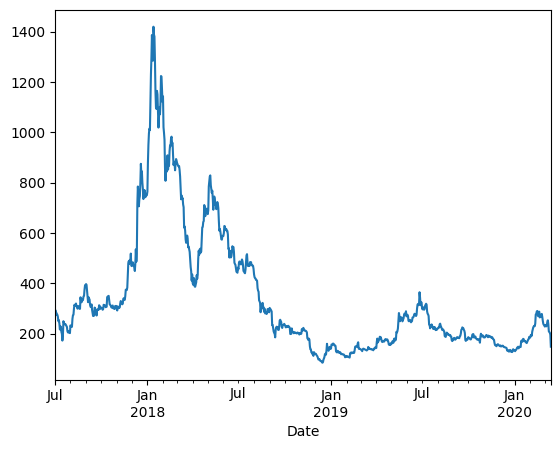

In [ ]:
highs.plot() # running above cell and then this cell will o/p a line graph

**Resampling multiple columns**

In [ ]:
# NOTE: it's senseless to apply min() to 'High' col in next line coz in real life we must seek max() of 'High' and min() of 'Low'
df[['High', 'Low']].resample('D').min().head(3)  # fetching min 'High' & 'Low' vals per day (indicated by 'D')

,High,Low
Date,,
2017-07-01,260.56,253.23
2017-07-02,257.92,255.70
2017-07-03,276.23,273.07


In [ ]:
df.resample('W').min().head(3) # resampling ENTIRE data frame by week (indicated by 'W')

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2017-07-02,ETHUSD,256.81,257.92,253.23,256.81,573434.18,Saturday
2017-07-09,ETHUSD,233.45,234.00,231.25,233.45,138947.87,Friday
2017-07-16,ETHUSD,134.32,141.70,130.26,134.32,229799.27,Friday


**Resampling & aggregation together**

In [ ]:
# passing col names and aggregation fns on them; not that the agg. fns. are all in lowercase
df.resample('D').agg({'Close' : 'mean', 'High' : 'max', 'Low' : 'min', 'Volume' : 'sum'}).head(3)

,Close,High,Low,Volume
Date,,,,
2017-07-01,265.284615,279.99,253.23,28584024.81
2017-07-02,269.782500,293.73,255.70,52262287.78
2017-07-03,278.882083,285.00,273.07,35016353.53
